In [1]:
#import all the required libraries

import cv2
import numpy as np
import types
import os
import matplotlib.pyplot as plt

In [2]:
def messageToBinary(message):
    if type(message) == str:
        return ''.join([ format(ord(i), "08b") for i in message ]) # 0:8 binary
    elif type(message) == bytes or type(message) == np.ndarray:
        return [ format(i, "08b") for i in message ]
    elif type(message) == int or type(message) == np.uint8:
        return format(message, "08b")
    else:
        raise TypeError("Input type not supported")


In [3]:
# Function to hide the secret message into the image

def hideData(image, secret_message):

    # calculate the maximum bytes to encode
    n_bytes = image.shape[0] * image.shape[1] * 3 // 8
    print("Maximum bytes to encode:", n_bytes)

    #Check if the number of bytes to encode is less than the maximum bytes in the image
    if len(secret_message) > n_bytes:
        raise ValueError("Error encountered insufficient bytes, need bigger image or less data to encode")

    secret_message += "#####" # you can use any string as the delimeter

    data_index = 0
    # convert input data to binary format using messageToBinary() fucntion
    binary_secret_msg = messageToBinary(secret_message)

    data_len = len(binary_secret_msg) #Find the length of data that needs to to be hidden
    for values in image: # values is a row of pixels [[r, g, b], [r, g, b], ...]
        for pixel in values:
            # convert RGB values to binary format
            r, g, b = messageToBinary(pixel)
            # modify the least significant bit only if there is still data to hide
            if data_index < data_len:
                # hide the data into least significant bit of red pixel / int('binary', 2) converts binary to decimal
                pixel[0]=int(r[ :- 1]+ binary_secret_msg[data_index], 2) # modify the last bit of red pixel
                data_index += 1
            if data_index < data_len:
                # hide the data into least significant bit of green pixel
                pixel[1]=int(g[ :- 1]+ binary_secret_msg[data_index],2)
                data_index += 1
            if data_index < data_len:
                # hide the data into least significant bit of blue pixel
                pixel[2]=int(b[ :- 1]+binary_secret_msg[data_index], 2)
                data_index += 1
            # if data is encoded, just break out of the loop
            if data_index >= data_len:
                break

    return image


In [4]:
def showData(image):

    binary_data = ""
    for values in image:
        for pixel in values:
            r, g, b = messageToBinary(pixel) #convert the red, green and blue values to binary
            binary_data += r[-1] #extracting data from the least significant bit
            binary_data += g[-1] #extracting data from the least significant bit
            binary_data += b[-1] #extracting data from the least significant bit
    # split by 8-bits
    all_bytes = [ binary_data[i: i+8] for i in range(0, len(binary_data), 8) ]
    # convert from bits to characters
    decoded_data = ""
    for byte in all_bytes:
        decoded_data += chr(int(byte, 2))
        if decoded_data[-5:] == "#####": #check if we have reached the delimeter
            break
    print(decoded_data)
    return decoded_data[ :- 5] #remove the delimeter to show the original hidden message

In [23]:
# Encode data into image
def encode_text():
    image_name = input("Enter image name(with extension): ")
    image = cv2.imread('data/'+ image_name) # Read the input image using OpenCV-Python.
    #It is a library of Python bindings designed to solve computer vision protems.

    #details of the image
    print("The shape of the image is: ",image.shape) #check the shape of image
   

    
    data = input("Enter data to be encoded : ")
    if (len(data) == 0):
        raise ValueError('Data is empty')

    filename = input("Enter the name of new encoded image(with extension): ")
    encoded_image = hideData(image, data) # call the hideData function to hide the data in the image
    cv2.imwrite(('output/'+filename), encoded_image)

    # Display both images side by side
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(encoded_image,cv2.COLOR_BGR2RGB))
    plt.title("Encoded Image")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

In [24]:
# Decode the data in the image
def decode_text():
    # read the image that contains the hidden image
    image_name = input("Enter the name of the steganographed image that you want to decode(with extension): ")
    image = cv2.imread('output/'+image_name) #read the image using cv2.imread()

    text = showData(image)
    return text


Encoding .... 
The shape of the image is:  (500, 500, 3)
Maximum bytes to encode: 93750


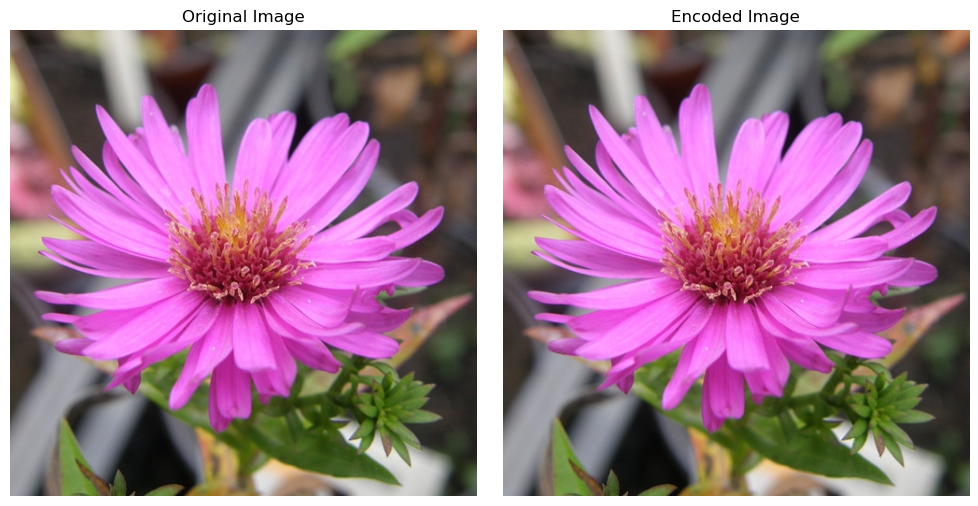

In [25]:
# Image Steganography

def Steganography():
    a = input("Image Steganography \n 1. Encode the data \n 2. Decode the data\nEnter your choice: ")
    userinput = int(a)
    if (userinput == 1):
        print("\nEncoding .... ")
        encode_text()

    elif (userinput == 2):
        print("\nDecoding .... ")
        print("Decoded message is " + decode_text())
    else:
        raise Exception("Enter correct input")
    
Steganography() #encode image

In [26]:
Steganography() #decode image


Decoding .... 
i love computer vision#####
Decoded message is i love computer vision
